In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import io
import requests

In [25]:
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", header=0)
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178387,178418,178457,178513,178574,178611,178638,178648,178689,178745
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274462,274504,274520,274535,274606,274606,274737,274791,274828,274828
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265739,265739,265741,265746,265746,265754,265761,265761,265767,265771
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,41013,41013,41013,41013,41013,41013
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656617,656617,656617,656876,656876,656876,656876,656876,656876,656876
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11817,11817,11818,11818,11818,11818,11818,11818,11818,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318467,318515,318515,318640,318640,318984,318984,318984,318984,319316


In [26]:
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", header=0)
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3973,3973,3973,3973,3973,3974,3974,3974,3974,3976


In [27]:
df_com=df_confirmed.set_index('Country/Region').join(df_deaths.set_index('Country/Region'), lsuffix='_x', rsuffix='_y')
display(df_com)

,Province/State_x,Lat_x,Long_x,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,...,4/16/22_y,4/17/22_y,4/18/22_y,4/19/22_y,4/20/22_y,4/21/22_y,4/22/22_y,4/23/22_y,4/24/22_y,4/25/22_y
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149


In [28]:
db= df_com[['Lat_x', 'Long_x', 'Confirmed Cases', 'Deaths']]
db

KeyError: "['Confirmed Cases', 'Deaths'] not in index"

In [29]:
# checking for any null values in deaths and confirmed cases
db.isna().sum()

NameError: name 'db' is not defined

In [30]:
#    import json
#    key = '2TW54WN94POX4QKT'
 #   url= 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey='+key
  #  stock_price=requests.get(url)
   # data_stock_price=stock_price.json()
    #data_stock_price

In [31]:
# 4. 
import json
key = 'LH1QNQRB8AUG767R'
url= 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey='+key
stock_price=requests.get(url)
data_stock_price=stock_price.json()
data_stock_price

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2022-04-25',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2022-04-25': {'1. open': '273.2900',
   '2. high': '281.1100',
   '3. low': '270.7700',
   '4. close': '280.7200',
   '5. volume': '35678852'},
  '2022-04-22': {'1. open': '281.6800',
   '2. high': '283.2000',
   '3. low': '273.3800',
   '4. close': '274.0300',
   '5. volume': '29405798'},
  '2022-04-21': {'1. open': '288.5800',
   '2. high': '293.3000',
   '3. low': '280.0600',
   '4. close': '280.8100',
   '5. volume': '29454587'},
  '2022-04-20': {'1. open': '289.4000',
   '2. high': '289.7000',
   '3. low': '285.3702',
   '4. close': '286.3600',
   '5. volume': '22805341'},
  '2022-04-19': {'1. open': '279.3800',
   '2. high': '286.1700',
   '3. low': '278.4100',
   '4. close': '285.3000',
   '5. volume': '22297720'},
  '2022-04-18': {'1. open': '278

In [32]:
import requests
ts= TimeSeries(key='RAC69BWCN5KL47KJ',output_format='pandas')
USA=ts.get_weekly_adjusted('PSA')
Canada=ts.get_weekly_adjusted('TSCO.LON')

In [33]:
df1=pd.DataFrame(USA[0])
df2=pd.DataFrame(Canada[0])
print(df1)
print(df2)

            1. open  2. high   3. low  4. close  5. adjusted close  6. volume  \
date                                                                            
2022-04-25   402.92   403.73  392.770    399.00           399.0000   933699.0   
2022-04-22   408.53   421.76  402.010    402.36           402.3600  2877349.0   
2022-04-14   409.36   411.67  398.815    408.50           408.5000  2331191.0   
2022-04-08   396.62   411.89  388.460    408.95           408.9500  3362675.0   
2022-04-01   376.62   400.45  376.060    396.51           396.5100  3729601.0   
...             ...      ...      ...       ...                ...        ...   
1999-12-10    22.56    22.75   22.000     22.00             9.7257  1464400.0   
1999-12-03    23.00    23.13   22.500     22.81            10.0838  1410700.0   
1999-11-26    23.88    23.88   23.060     23.13            10.2253   570800.0   
1999-11-19    23.19    24.13   22.940     24.13            10.6673  1087700.0   
1999-11-12    24.88    25.06

In [34]:
# high and low prices of stocks in USA by daily basis
df_USA_stocks=df1.drop(['1. open', '4. close','5. adjusted close','6. volume','7. dividend amount'], axis=1)
df_USA_stocks

,2. high,3. low
date,,
2022-04-25,403.73,392.770
2022-04-22,421.76,402.010
2022-04-14,411.67,398.815
2022-04-08,411.89,388.460
2022-04-01,400.45,376.060
...,...,...
1999-12-10,22.75,22.000
1999-12-03,23.13,22.500
1999-11-26,23.88,23.060


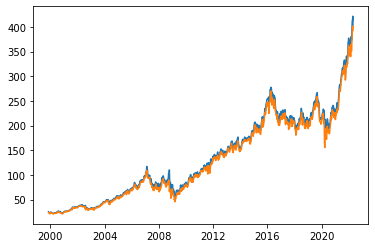

In [35]:
plt.plot(df_USA_stocks['2. high'])
plt.plot(df_USA_stocks['3. low'])

In [36]:
# high and low prices of stocks in Canada by daily basis
df_Canada_stocks=df2.drop(['1. open', '4. close','5. adjusted close','6. volume','7. dividend amount'], axis=1)
df_Canada_stocks

,2. high,3. low
date,,
2022-04-25,269.7000,260.3910
2022-04-22,271.9000,262.4000
2022-04-14,275.8000,251.6088
2022-04-08,283.4000,269.1000
2022-04-01,284.4325,276.0000
...,...,...
2005-02-11,316.5001,307.7501
2005-02-04,316.5001,307.0001
2005-01-28,312.5001,305.0001


In [46]:
df_merge = pd.merge(df_USA_stocks, df_Canada_stocks)
df_merge

,2. high,3. low


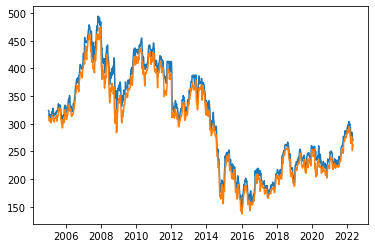

In [41]:
plt.plot(df_Canada_stocks['2. high'])
plt.plot(df_Canada_stocks['3. low'])

In [42]:
key = 'J03E9G54DQQKK36T'
stock="AC"
url= 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol='+stock+'&apikey='+key
stock_price=requests.get(url)
stock_aircanada=stock_price.json()
stock_aircanada

{'Meta Data': {'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AC',
  '3. Last Refreshed': '2022-04-25',
  '4. Time Zone': 'US/Eastern'},
 'Weekly Time Series': {'2022-04-25': {'1. open': '39.4100',
   '2. high': '40.2126',
   '3. low': '38.2000',
   '4. close': '39.5000',
   '5. volume': '7149'},
  '2022-04-22': {'1. open': '38.2000',
   '2. high': '41.0182',
   '3. low': '36.9968',
   '4. close': '39.7600',
   '5. volume': '73740'},
  '2022-04-14': {'1. open': '37.7500',
   '2. high': '39.6390',
   '3. low': '36.5800',
   '4. close': '38.5700',
   '5. volume': '50340'},
  '2022-04-08': {'1. open': '40.8220',
   '2. high': '40.8220',
   '3. low': '36.9700',
   '4. close': '37.5600',
   '5. volume': '44755'},
  '2022-04-01': {'1. open': '41.3500',
   '2. high': '43.0964',
   '3. low': '40.5000',
   '4. close': '40.9700',
   '5. volume': '26885'},
  '2022-03-25': {'1. open': '41.1000',
   '2. high': '41.4894',
   '3. low': '39.6000',
   '4. close'

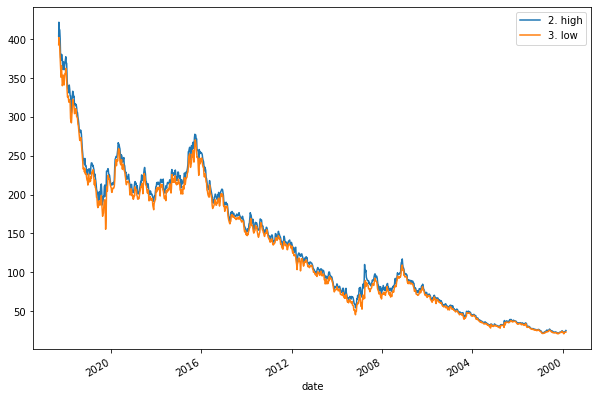

In [45]:
df1=df1.astype(float)
df1[['2. high', '3. low']].plot(figsize = (10,7))
plt.gca().invert_xaxis()
plt.show()